In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/content/car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'])
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = df['Selling_Price']

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [5]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestRegressor()

In [6]:
Y_hat = model.predict(X_test)
mse = mean_squared_error(Y_test, Y_hat)
print(mse)

4.832618352417583


In [7]:
for i in range(5):
  print(Y_test.iloc[i], Y_hat[i])

2.85 2.442999999999999
9.25 8.45390000000001
23.0 21.688500000000005
5.25 4.784499999999997
5.5 5.302


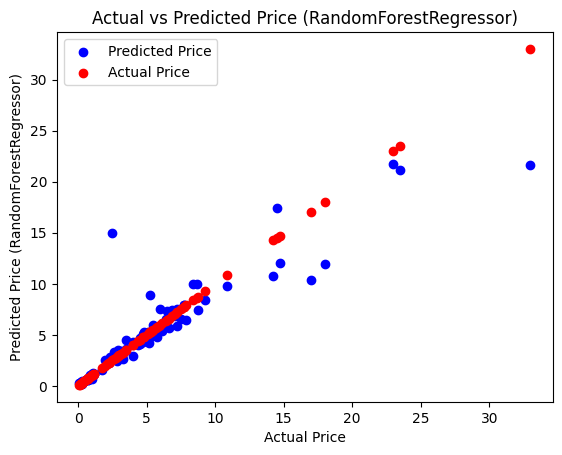

In [8]:
# Visualize the results with custom colors
plt.scatter(Y_test, Y_hat, color='blue', label='Predicted Price')  # Predicted sales points in blue
plt.scatter(Y_test, Y_test, color='red', label='Actual Price')  # Actual sales points in red
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (RandomForestRegressor)')
plt.title('Actual vs Predicted Price (RandomForestRegressor)')
plt.legend()
plt.show()